In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

from graph_utils import *

In [2]:
# The groundtruth
N = 100
x_star = generate_population(N)

In [24]:
# Parameters
r = 0.3
d = 5
a = (2. * d) / (1. + r)
b = a * r

print(f'd = {d}')
print(f'r = {r}')
print(f'a = {a}')
print(f'b = {b}')

d = 5
r = 0.3
a = 7.692307692307692
b = 2.3076923076923075


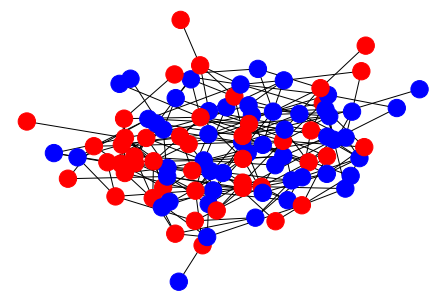

In [25]:
G = build_graph(x_star, a, b)
draw_graph(G, x_star)

# Metropolis

In [26]:
from metropolis import *

A = nx.to_numpy_array(G)
mc = Metropolis(A, a, b)

In [42]:
nb_run = 1000
nb_iter = 1000
x_list = []

# Run simulation
for n in range(nb_run):
    mc.reset()
    for i in range(nb_iter):
        mc.step()
    x_list.append(mc.x.copy())

x_hat overlap: 0.14


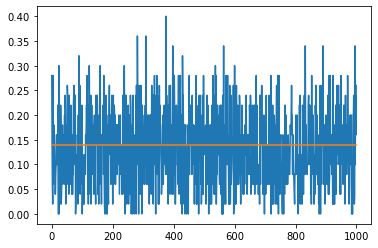

In [51]:
x_hat = np.average(x_list, axis=0)
x_hat = np.where(x_hat > 0, 1, -1)
q_hat = compute_overlap(x_star, x_hat)
print(f'x_hat overlap: {q_hat}')

ns = range(len(qs))
qs = [compute_overlap(x_star, x) for x in x_list]
plt.plot(qs)
plt.plot(ns, [q_hat for i in ns]);